In [ ]:
import pandas as pd
prices_day_0 = pd.read_csv('prices_round_3_day_0.csv', delimiter=';')
prices_day_1 = pd.read_csv('prices_round_3_day_1.csv', delimiter=';')
prices_day_2 = pd.read_csv('prices_round_3_day_2.csv', delimiter=';')
trades_day_0 = pd.read_csv('trades_round_3_day_0_nn.csv', delimiter=';')
trades_day_1 = pd.read_csv('trades_round_3_day_1_nn.csv', delimiter=';')
trades_day_2 = pd.read_csv('trades_round_3_day_2_nn.csv', delimiter=';')


In [ ]:
## Display the first few rows of each dataset
print("Prices Day 0:")
print(prices_day_0.head())
print("\nPrices Day 1:")
print(prices_day_1.head())
print("\nPrices Day 2:")
print(prices_day_2.head())
print("\nTrades Day 0:")
print(trades_day_0.head())
print("\nTrades Day 1:")
print(trades_day_1.head())
print("\nTrades Day 2:")
print(trades_day_2.head())

# Summary statistics for each dataset
print("Summary of Prices Day 0:")
print(prices_day_0.describe())
print("\nSummary of Trades Day 0:")
print(trades_day_0.describe())


In [ ]:
# Check for missing values
print("Missing values in Prices Day 0:")
print(prices_day_0.isnull().sum())
print("\nMissing values in Trades Day 0:")
print(trades_day_0.isnull().sum())

# Check for duplicates
print("Duplicates in Prices Day 0:")
print(prices_day_0.duplicated().sum())
print("\nDuplicates in Trades Day 0:")
print(trades_day_0.duplicated().sum())


In [ ]:
import matplotlib.pyplot as plt

# Function to plot price trends
def plot_price_trends(data, product_name):
    filtered_data = data[data['product'] == product_name]
    plt.figure(figsize=(14, 7))
    plt.plot(filtered_data['timestamp'], filtered_data['mid_price'], label=f'Mid Price of {product_name}')
    plt.title(f'Price Trend for {product_name}')
    plt.xlabel('Timestamp')
    plt.ylabel('Mid Price')
    plt.legend()
    plt.show()

# Call this function for each product
plot_price_trends(prices_day_0, 'CHOCOLATE')
plot_price_trends(prices_day_0, 'STRAWBERRIES')
plot_price_trends(prices_day_0, 'ROSES')
plot_price_trends(prices_day_0, 'GIFT_BASKET')


In [ ]:
# Example of calculating correlations between product prices
prices_day_0['CHOCOLATE_price'] = prices_day_0[prices_day_0['product'] == 'CHOCOLATE']['mid_price']
prices_day_0['STRAWBERRIES_price'] = prices_day_0[prices_day_0['product'] == 'STRAWBERRIES']['mid_price']
prices_day_0['ROSES_price'] = prices_day_0[prices_day_0['product'] == 'ROSES']['mid_price']
prices_day_0['GIFT_BASKET_price'] = prices_day_0[prices_day_0['product'] == 'GIFT_BASKET']['mid_price']

print(prices_day_0[['CHOCOLATE_price', 'STRAWBERRIES_price', 'ROSES_price', 'GIFT_BASKET_price']].corr())


In [ ]:
# Summary statistics of trade volumes for each product
print("Trade Volume Stats for CHOCOLATE:")
print(trades_day_0[trades_day_0['symbol'] == 'CHOCOLATE']['quantity'].describe())
print("Trade Volume Stats for STRAWBERRIES:")
print(trades_day_0[trades_day_0['symbol'] == 'STRAWBERRIES']['quantity'].describe())
print("Trade Volume Stats for ROSES:")
print(trades_day_0[trades_day_0['symbol'] == 'ROSES']['quantity'].describe())
print("Trade Volume Stats for GIFT_BASKET:")
print(trades_day_0[trades_day_0['symbol'] == 'GIFT_BASKET']['quantity'].describe())


In [ ]:
# Create a DataFrame with just the necessary columns
data = prices_day_0.pivot(index='timestamp', columns='product', values='mid_price')

# Drop rows with any NaN values to align data
data.dropna(inplace=True)

# Function to compute cross-correlation between two time series
def cross_correlation(series1, series2, lag=10):  # Adjust 'lag' to your specific dataset's needs
    correlation = [series1.corr(series2.shift(i)) for i in range(-lag, lag+1)]
    return correlation

# Calculate cross-correlation
lag_range = 10  # or any other value that seems appropriate based on your data's frequency
chocolate_cc = cross_correlation(data['GIFT_BASKET'], data['CHOCOLATE'], lag=lag_range)
strawberries_cc = cross_correlation(data['GIFT_BASKET'], data['STRAWBERRIES'], lag=lag_range)
roses_cc = cross_correlation(data['GIFT_BASKET'], data['ROSES'], lag=lag_range)

# Plotting cross-correlation results

lags = range(-lag_range, lag_range + 1)
plt.figure(figsize=(12, 8))
plt.plot(lags, chocolate_cc, label='CHOCOLATE')
plt.plot(lags, strawberries_cc, label='STRAWBERRIES')
plt.plot(lags, roses_cc, label='ROSES')
plt.title('Cross-Correlation Function Between GIFT_BASKET and Components')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'mid_price' for 'GIFT_BASKET'
data = prices_day_0[prices_day_0['product'] == 'GIFT_BASKET'].copy()
data.set_index('timestamp', inplace=True)

# Calculate moving averages
data['SMA_10'] = data['mid_price'].rolling(window=10).mean()
data['SMA_30'] = data['mid_price'].rolling(window=30).mean()

# Calculate RSI
delta = data['mid_price'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
data['middle_band'] = data['mid_price'].rolling(window=20).mean()
data['std_dev'] = data['mid_price'].rolling(window=20).std()
data['upper_band'] = data['middle_band'] + (data['std_dev'] * 2)
data['lower_band'] = data['middle_band'] - (data['std_dev'] * 2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['mid_price'], label='Mid Price')
plt.plot(data['SMA_10'], label='10-period SMA', linewidth=0.75)
plt.plot(data['SMA_30'], label='30-period SMA', linewidth=0.75)
plt.plot(data['upper_band'], label='Upper Bollinger Band', linestyle='--')
plt.plot(data['lower_band'], label='Lower Bollinger Band', linestyle='--')
plt.fill_between(data.index, data['lower_band'], data['upper_band'], color='grey', alpha=0.3)
plt.title('Technical Indicators for GIFT_BASKET')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Assuming you have a DataFrame 'trades' with 'timestamp' and 'quantity'
# Summing up quantities per timestamp for simplification
volume_data = trades[trades['symbol'] == 'GIFT_BASKET'].groupby('timestamp')['quantity'].sum().reset_index()

# Merging with your existing price data
data = pd.merge(data, volume_data, on='timestamp', how='left').fillna(0)  # fill missing volumes with 0

# Now plotting price with volume
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 10))
ax1.plot(data['timestamp'], data['mid_price'], label='Mid Price')
ax1.set_title('Price and Volume Chart for GIFT_BASKET')
ax1.set_ylabel('Mid Price')
ax1.legend()

ax2.bar(data['timestamp'], data['quantity'], color='grey', alpha=0.3)
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Volume')
ax2.legend(['Volume'])
plt.show()



In [ ]:
# Print the first few rows and describe the datasets for Day 1 and Day 2
print(prices_day_1.head())
print(prices_day_1.describe())
print(trades_day_1.head())
print(trades_day_1.describe())

print(prices_day_2.head())
print(prices_day_2.describe())
print(trades_day_2.head())
print(trades_day_2.describe())


In [ ]:
# Function to plot price trends for a specific product
def plot_price_trends(prices, product_name):
    product_prices = prices[prices['product'] == product_name]
    plt.figure(figsize=(12, 6))
    plt.plot(product_prices['timestamp'], product_prices['mid_price'], label=f'Mid Price for {product_name}')
    plt.title(f'Price Trends for {product_name} Over Days')
    plt.xlabel('Timestamp')
    plt.ylabel('Mid Price')
    plt.legend()
    plt.show()

# Example usage:
plot_price_trends(prices_day_1, 'CHOCOLATE')
plot_price_trends(prices_day_2, 'CHOCOLATE')
plot_price_trends(prices_day_1, 'STRAWBERRIES')
plot_price_trends(prices_day_2, 'STRAWBERRIES')
plot_price_trends(prices_day_1, 'ROSES')
plot_price_trends(prices_day_2, 'ROSES')
plot_price_trends(prices_day_1, 'GIFT_BASKET')
plot_price_trends(prices_day_2, 'GIFT_BASKET')




In [ ]:
# Analyze volume from trade data
def plot_trade_volumes(trades, product_name):
    product_trades = trades[trades['symbol'] == product_name]
    plt.figure(figsize=(12, 6))
    plt.bar(product_trades['timestamp'], product_trades['quantity'], alpha=0.7)
    plt.title(f'Trade Volumes for {product_name} Over Days')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()

# Example usage:
plot_trade_volumes(trades_day_1, 'CHOCOLATE')
plot_trade_volumes(trades_day_2, 'CHOCOLATE')
plot_trade_volumes(trades_day_1, 'STRAWBERRIES')
plot_trade_volumes(trades_day_2, 'STRAWBERRIES')
plot_trade_volumes(trades_day_1, 'ROSES')
plot_trade_volumes(trades_day_2, 'ROSES')
plot_trade_volumes(trades_day_1, 'GIFT_BASKET')
plot_trade_volumes(trades_day_2, 'GIFT_BASKET')



In [1]:
import json

def extract_sandbox_logs(filename):
    sandbox_logs = []
    with open(filename, 'r') as file:
        for line in file:
            try:
                entry = json.loads(line)
                if entry['sandboxLog']:  # Assuming empty strings are not of interest
                    sandbox_logs.append((entry['timestamp'], entry['sandboxLog']))
            except json.JSONDecodeError:
                continue  # Skip lines that are not valid JSON
    return sandbox_logs

sandbox_logs = extract_sandbox_logs('trade.log')
for timestamp, log in sandbox_logs:
    print(f"Timestamp: {timestamp}, Log: {log}")



In [2]:
def extract_lambda_logs(filename):
    lambda_logs = []
    with open(filename, 'r') as file:
        for line in file:
            try:
                entry = json.loads(line)
                if entry['lambdaLog']:
                    lambda_logs.append((entry['timestamp'], entry['lambdaLog']))
            except json.JSONDecodeError:
                continue
    return lambda_logs

lambda_logs = extract_lambda_logs('trade.log')
for timestamp, log in lambda_logs:
    print(f"Timestamp: {timestamp}, Log: {log}")



In [3]:
import pandas as pd
from io import StringIO

def extract_activity_logs_from_mixed_file(filename):
    activity_data = []
    collecting = False
    with open(filename, 'r') as file:
        for line in file:
            # Start collecting when CSV header is found
            if line.startswith('day;timestamp;product;'):
                collecting = True
                activity_data.append(line.strip())  # Include the header
                continue
            # Stop collecting on encountering a JSON-like start or end of file
            if line.startswith('{') and collecting:
                collecting = False
                continue
            # Collect data if in collecting mode
            if collecting:
                activity_data.append(line.strip())
    
    # Join all collected lines and read as CSV
    if activity_data:
        data = StringIO('\n'.join(activity_data))
        return pd.read_csv(data, delimiter=';')
    else:
        return None  # No data found

# Usage
filename = 'trade.log'
activity_logs = extract_activity_logs_from_mixed_file(filename)
if activity_logs is not None:
    print(activity_logs.head())
else:
    print("No activity logs found in the file.")



  day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0   0        0.0     CHOCOLATE       7999.0         111.0          NaN   
1   0        0.0   GIFT_BASKET      71348.0          19.0      71347.0   
2   0        0.0         ROSES      14999.0          72.0          NaN   
3   0        0.0  STRAWBERRIES       3999.0         210.0          NaN   
4   0      100.0     CHOCOLATE       8001.0          52.0       8000.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           NaN          NaN           NaN       8001.0         111.0   
1          24.0          NaN           NaN      71362.0          19.0   
2           NaN          NaN           NaN      15001.0          72.0   
3           NaN          NaN           NaN       4001.0         210.0   
4          95.0          NaN           NaN       8002.0         147.0   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN          NaN     

/Users/kanishkaw/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Limit exceedances by product: Series([], Name: product, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

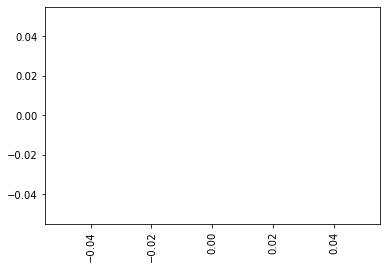

In [4]:
# Example: Count and plot limit exceedance incidents
import pandas as pd
import matplotlib.pyplot as plt

def analyze_sandbox_logs(sandbox_logs):
    limit_exceedances = pd.DataFrame(sandbox_logs, columns=['timestamp', 'log'])
    limit_exceedances['product'] = limit_exceedances['log'].apply(lambda x: x.split(' ')[2])
    counts = limit_exceedances['product'].value_counts()
    print("Limit exceedances by product:", counts)
    counts.plot(kind='bar')
    plt.title('Product Limit Exceedances')
    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.show()

analyze_sandbox_logs(sandbox_logs)  # Assuming sandbox_logs is a list of tuples (timestamp, log message)


          timestamp    bid_price_1   bid_volume_1   bid_price_2  bid_volume_2  \
count  1.200000e+05  120000.000000  120000.000000  54756.000000  54756.000000   
mean   1.499950e+06   24287.604442      86.932850  42655.183140     48.106746   
std    8.660290e+05   27060.670121      80.227374  30986.095787     46.722094   
min    0.000000e+00    3972.000000       1.000000   3972.000000      1.000000   
25%    7.499750e+05    6807.750000      18.000000   7979.000000     16.000000   
50%    1.499950e+06   11139.000000      62.000000  69671.000000     26.000000   
75%    2.249925e+06   28584.500000     133.000000  70976.000000     69.000000   
max    2.999900e+06   71581.000000     306.000000  71580.000000    296.000000   

        bid_price_3  bid_volume_3    ask_price_1   ask_volume_1   ask_price_2  \
count  20277.000000  20277.000000  120000.000000  120000.000000  54764.000000   
mean   70698.971347     22.037777   24291.336700      86.825508  42643.967040   
std      600.857039      4.

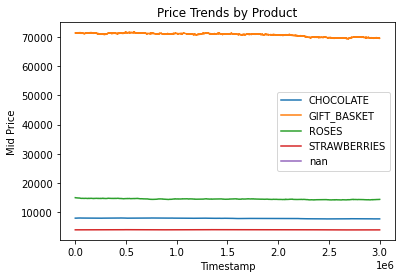

In [5]:
# Assuming activity_logs is a DataFrame
def analyze_activity_logs(activity_logs):
    print(activity_logs.describe())
    # Plotting price trends
    for product in activity_logs['product'].unique():
        product_data = activity_logs[activity_logs['product'] == product]
        plt.plot(product_data['timestamp'], product_data['mid_price'], label=product)
    plt.title('Price Trends by Product')
    plt.xlabel('Timestamp')
    plt.ylabel('Mid Price')
    plt.legend()
    plt.show()

analyze_activity_logs(activity_logs)  # Assuming activity_logs is already loaded into a DataFrame
